# Tsyganenko (Geopack and T96)

In [1]:
import datetime
import numpy as np
import tsyganenko as tsy

## Using the `Trace` class

### Plotting field lines as a schematic

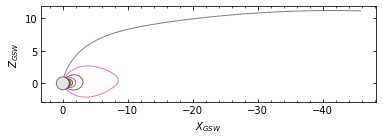


vsw_gse=[  -400,     0,     0]   [m/s]
pdyn=       2.0                  [nPa]
dst=       -5.0                  [nT]
by_imf=     0.0                  [nT]
bz_imf=    -5.0                  [nT]

Coords: geo
(latitude [deg], longitude [deg], distance from center of the Earth [km])

(10.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(10.000, 180.000, 6371.200)
    --> SH(-4.753, 177.493, 6371.146)
(20.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(20.000, 180.000, 6371.162)
    --> SH(-12.857, 174.421, 6371.148)
(30.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(30.000, 180.000, 6371.200)
    --> SH(-20.612, 171.449, 6371.192)
(40.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(40.000, 180.000, 6371.201)
    --> SH(-28.542, 168.266, 6371.176)
(50.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(50.000, 180.000, 6371.200)
    --> SH(-36.933, 164.254, 6371.191)
(60.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(60.000, 180.000, 6

In [2]:
trace_dt = datetime.datetime(2001,9,22,12)
lats = np.arange(10, 90, 10)
lons = 180.
rhos = tsy.RE
trace = tsy.Trace(lats, lons, rhos, datetime=trace_dt)
ax = trace.plot()
plt.show()
print(trace)

### Making frames for a video of the Dungey Cycle

In [3]:
from matplotlib import pyplot as plt

In [4]:
trace_dt = dt.datetime(2001,9,22,12)

latlon = np.array([[60,     0],
                   [71,     0],
                   [84,     0],
                   [84,   180],
                   [80,   180],
                   [76,   180],
                   [71.5, 180],
                   [71,   180],
                   [69,   180],
                   [60,   180]])

video_trace = tsy.Trace(latlon[:,0], latlon[:,1], tsy.RE, datetime = trace_dt)

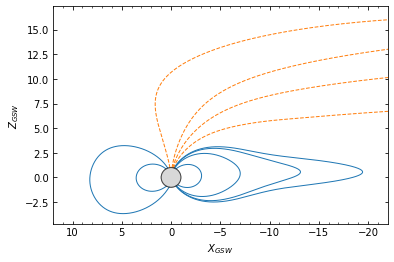


vsw_gse=[  -400,     0,     0]   [m/s]
pdyn=       2.0                  [nPa]
dst=       -5.0                  [nT]
by_imf=     0.0                  [nT]
bz_imf=    -5.0                  [nT]

Coords: geo
(latitude [deg], longitude [deg], distance from center of the Earth [km])

(60.000,  0.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(60.000, 360.000, 6371.200)
    --> SH(-56.749, 34.077, 6371.195)
(71.000,  0.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(71.000, 360.000, 6371.168)
    --> SH(-66.761, 61.236, 6371.195)
(84.000,  0.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(84.000, 360.000, 6371.200)
    --> SH(26.660, 153.899, 272385.327)
(84.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(84.000, 180.000, 6371.200)
    --> SH(19.993, 166.971, 300745.289)
(80.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(80.000, 180.000, 6371.200)
    --> SH(15.037, 168.635, 306862.024)
(76.000, 180.000, 6371.200) @ 12:00 UT (22-Sep-01)
    --> NH(76.000, 180.000, 63

In [5]:
ax = video_trace.plot(only_pts=[0,1,6,7,8,9], color='C0')
ax = video_trace.plot(only_pts=[2,3,4,5], color='C1', ls='--')
ax.set(xlim=(12, -22), aspect='equal')
plt.show()
print(video_trace)

In [6]:
for i, _ in enumerate(latlon):
    fig, ax = plt.subplots(figsize = [16,9])
    video_trace.plot(ax, only_pts=i, lw=5)
    ax.set(xlim=(10,-20), ylim=(-5,10), aspect='equal')
    fig.savefig("Dungey Cycle {:02d}.png".format(i))
    fig.clf()
    plt.close(fig)
    del(fig)

## Using the `geopack` module

In [3]:
# Inputs
# Date and time
year = 2000
doy = 1
hr = 12
mn = 0
sc = 0
# Solar wind speed
vxgse = -400.
vygse = 0.
vzgse = 0.
# Execution parameters
lmax = 5000
rlim = 60. 
r0 = 1. 
dsmax = .01
err = .000001
# Direction of the tracing
mapto = 1
# Magnetic activity [SW pressure (nPa), Dst, ByIMF, BzIMF]
parmod = np.zeros(10)
parmod[0:4] = [2, -8, -2, -5]
# Start point (rh in Re)
lat = 50.
lon = 0.
rh = 0.

# This has to be called first
tsyganenko.Geopack.recalc_08(year,doy,hr,mn,sc,vxgse,vygse,vzgse)

# Convert lat,lon to geographic cartesian and then gsw
r,theta,phi, xgeo, ygeo, zgeo = tsyganenko.Geopack.sphcar_08(1., np.radians(90.-lat), np.radians(lon), 0., 0., 0., 1)
xgeo,ygeo,zgeo,xgsw,ygsw,zgsw  = tsyganenko.Geopack.geogsw_08(xgeo, ygeo, zgeo,0,0,0,1)

# Trace field line
xfgsw,yfgsw,zfgsw,xarr,yarr,zarr,l = tsyganenko.Geopack.trace_08(xgsw,ygsw,zgsw,mapto,dsmax,err, 
    rlim,r0,0,parmod,'T96_01','IGRF_GSW_08',lmax) 

# Convert back to spherical geographic coords
xfgeo,yfgeo,zfgeo,xfgsw,yfgsw,zfgsw  = tsyganenko.Geopack.geogsw_08(0,0,0,xfgsw,yfgsw,zfgsw,-1)
gcR, gdcolat, gdlon, xgeo, ygeo, zgeo = tsyganenko.Geopack.sphcar_08(0., 0., 0., xfgeo, yfgeo, zfgeo, -1)


print '** START: {:6.3f}, {:6.3f}, {:6.3f}'.format(lat, lon, 1.)
print '** STOP:  {:6.3f}, {:6.3f}, {:6.3f}'.format(90.-np.degrees(gdcolat), np.degrees(gdlon), gcR)

** START: 50.000,  0.000,  1.000
** STOP:  -40.369, 17.660,  1.000


(-4, 4)

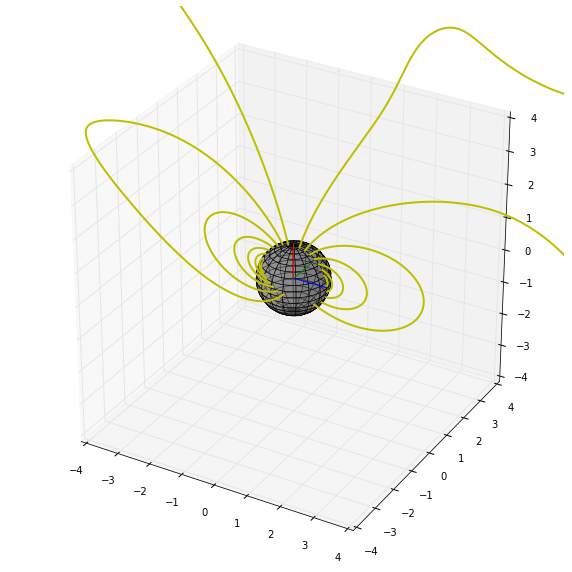

In [4]:
# A quick checking plot
from mpl_toolkits.mplot3d import proj3d
import numpy as np
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot coordinate system
ax.plot3D([0,1],[0,0],[0,0],'b')
ax.plot3D([0,0],[0,1],[0,0],'g')
ax.plot3D([0,0],[0,0],[0,1],'r')

# First plot a nice sphere for the Earth
u = np.linspace(0, 2 * np.pi, 179)
v = np.linspace(0, np.pi, 179)
tx = np.outer(np.cos(u), np.sin(v))
ty = np.outer(np.sin(u), np.sin(v))
tz = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(tx,ty,tz,rstride=10, cstride=10, color='grey', alpha=.5, zorder=2, linewidth=0.5)

# Then plot the traced field line
latarr = [10.,20.,30.,40.,50.,60.,70.,80.]
lonarr = [0., 180.]
rh = 0.
for lon in lonarr:
    for lat in latarr:
        r,theta,phi, xgeo, ygeo, zgeo = tsyganenko.Geopack.sphcar_08(1., np.radians(90.-lat), np.radians(lon), 0., 0., 0., 1)
        xgeo,ygeo,zgeo,xgsw,ygsw,zgsw  = tsyganenko.Geopack.geogsw_08(xgeo, ygeo, zgeo,0,0,0,1)
        xfgsw,yfgsw,zfgsw,xarr,yarr,zarr,l = tsyganenko.Geopack.trace_08(xgsw,ygsw,zgsw,mapto,dsmax,err, 
            rlim,r0,0,parmod,'T96_01','IGRF_GSW_08',lmax) 
        for i in xrange(l):
            xgeo,ygeo,zgeo,dum,dum,dum  = tsyganenko.Geopack.geogsw_08(0,0,0,xarr[i],yarr[i],zarr[i],-1)
            xarr[i],yarr[i],zarr[i] = xgeo,ygeo,zgeo
        ax.plot3D(xarr[0:l],yarr[0:l],zarr[0:l], zorder=3, linewidth=2, color='y')

# Set plot limits
lim=4
ax.set_xlim3d([-lim,lim])
ax.set_ylim3d([-lim,lim])
ax.set_zlim3d([-lim,lim])